# Sentiment Analysis Notebook

#### This notebook contains a demonstration of the tools necessary for conducting descriptive analysis of the data. This includes things such as frequency analysis, descripting statistics and temporal frequency.

In [41]:
import trt_API.process as proc
import trt_API.analysis as ana
import trt_API.sentiment as sent
from pathlib import Path
import pandas as pd
import datetime
SORTED = False
pd.set_option('display.max_rows', 500)

## Variables for Analysis

In [42]:
# Set the path to the parent directory containing all Tweets of interest
DIRECTORY = './tweets/*'
# Set to True to isolate english language tweets
ENGLISH = False


## Load Tweet and Generate Dataframe

In [43]:
tweet_objects = proc.loadTweetObjects(DIRECTORY)
print(len(tweet_objects))
df = proc.convertTweetsToDataframe(tweet_objects, ENGLISH)
print(df.shape[0])    

5066
Loaded utf-8 df.
Initial size: 5065
Dropping duplicates...
Final size: 2540
2540


## Extract Potential Cashtags

In [44]:
ctdf = proc.extractPossibleCashtags(df)

Total potential Cashtags: 53


## Removing Noisy Tweets

In [45]:
'''
*** Tweets often use popular hashtags with unrelated topics.
*** Noisy words can be identified to use to filter such tweets.
*** Enter these words below in the noisy_terms list.
'''
noisy_terms = []
cldf = proc.removeNoisyTerms(df, noisy_terms)

Removed 0 noisy terms.


## Remove Retweets

In [46]:
cldf_no_RT, cldf = proc.removeRetweets(cldf)
pd.set_option('display.max_colwidth', None)

Removed 555 duplicates.


/Users/rajuy/Documents/twitter_research_tools-master/notebooks/trt_API/process.py:210: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RT'][df.tweet.astype(str).str[0:2] == 'RT'] = df.tweet.str.split(':',expand=True).iloc[:,0]


In [47]:
print(cldf.shape[0])
print(cldf_no_RT.shape[0])

2540
1985


## SPLITTING DATA

### By date

In [48]:
cldf_no_RT, SORTED = ana.sortByDate(cldf_no_RT,SORTED,PRINT_TOP=False,TOP=10)

### By term

In [49]:
terms_of_interest = ['beale street','bealestreet']
more_terms_of_interest = ['black panther','blackpanther']
bsdf = proc.findTerms(cldf_no_RT, terms_of_interest)
bpdf = proc.findTerms(cldf_no_RT, more_terms_of_interest)

Found 0 terms of interest.
Found 0 terms of interest.


/Users/rajuy/Documents/twitter_research_tools-master/notebooks/trt_API/process.py:177: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.good = df['tweet'].str.lower().str.contains(\


## Convert Tweets to List

In [69]:
cldf_no_RT['original_tweet'][cldf_no_RT.original_tweet == 'None'] = cldf_no_RT['tweet']
cldf_no_RT['tweet'] = cldf_no_RT['original_tweet']
del cldf_no_RT['original_tweet']
print(cldf_no_RT.head())
tweets = list(cldf_no_RT.tweet)

                    date  followers        username           location  \
477  2019-07-02 01:24:13        227  WarrenLewisCPA  3609 O Street, NW   
4092 2019-07-02 01:32:33          9      hdcloutpay  Detroit Beach, MI   
4093 2019-07-02 01:36:54         45        BenKeefe          Minnesota   
4094 2019-07-02 01:49:01       2313     tisharowemd        Houston, TX   
4098 2019-07-02 01:57:44        649   nindalorthrup       Columbus, OH   

                                                                                                                                                                                                                                                                                                             tweet  \
477                                                       @tisharowemd @mstwill @AmericanAir That’s crazy. There is nothing revealing about wearing a romper which has been around since the 50’s. Plus, it’s just a plane ride full of people trying

<ipython-input-69-cb5c7012204d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cldf_no_RT['original_tweet'][cldf_no_RT.original_tweet == 'None'] = cldf_no_RT['tweet']


## Sentiment

### Total Sentiment

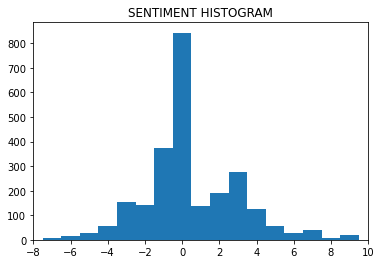

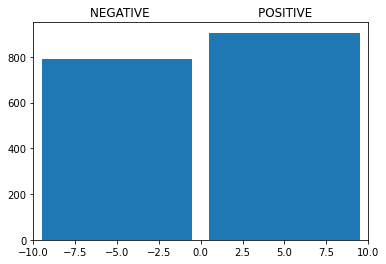

In [51]:
'''
*** First we can look at overall sentiment.
*** Here we will look at a histogram and a binary comparison (ignoring neutral).
'''
srange = (-8,10) # sentiment range (for plot)
sent.plotTotalSentiment(tweets,srange)

### Hashtag & Username Raw Sentiment

In [52]:
NORMALIZED = False
PLOT = True

#### Hashtags

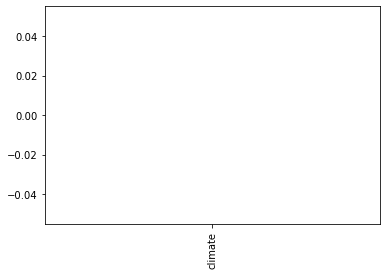

In [53]:
'''
*** Here we compute sentiment for each hashtag of interest.
'''
hashtags = ["climate"]
raw_htag_sent = sent.computeHashtagSentiment(tweets,hashtags,NORMALIZED,PLOT)

#### Usernames

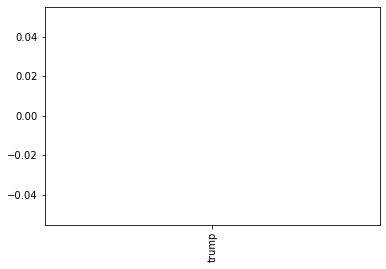

In [54]:
'''
*** Here we compute sentiment for each username of interest.
'''
usernames = ["Trump"]
raw_user_sent = sent.computeHashtagSentiment(tweets,usernames,NORMALIZED,PLOT)

### Hashtag & Username Normalized Sentiment

In [65]:
NORMALIZED = True

#### Hashtags

#### Usernames

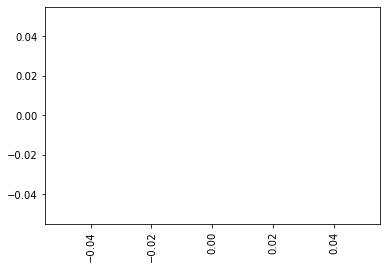

In [64]:
'''
*** Here we compute sentiment for each username of interest.
'''
usernames = []
norm_user_sent = sent.computeHashtagSentiment(tweets,usernames,NORMALIZED,PLOT)

## View Sentiment over Time

In [71]:
cldf_no_RT = sent.computeDataframeSentiment(cldf_no_RT)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<AxesSubplot:xlabel='date,date'>

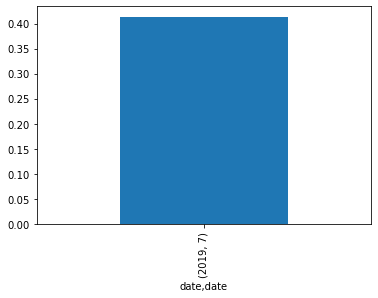

In [72]:
# df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
cldf_no_RT.sentiment.groupby([cldf_no_RT['date'].dt.year,cldf_no_RT["date"].dt.month]).mean().plot(kind="bar")

### Subset Sentiment by Date

## Compare Sentiment from Different Dataframes

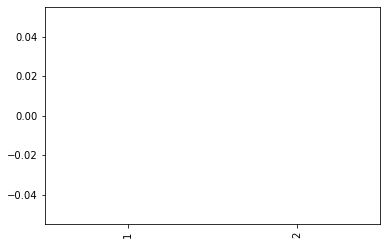

In [73]:
df_list = [bsdf,bpdf]
normalized = True
labels = ['1','2']
sent.compareSentimentByDataframe(df_list,normalized,labels)

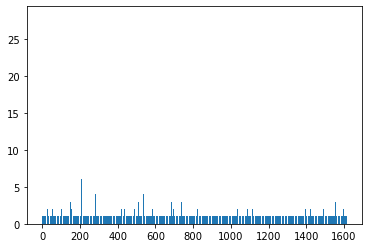

In [74]:
import matplotlib.pyplot as plt

unq = set(tweets)

freq = {uname: tweets.count(uname) for uname in unq}
plt.bar(range(len(unq)), freq.values())
plt.show()

In [75]:
from textblob import TextBlob
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')



def percentage(part,whole):
 return 100 * float(part)/float(whole)

positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
noOfTweet = 1000

negativeCount=0
positiveCount=0
neutralCount=0

for tweet in tweets:
    tweet_list.append(tweet)
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity


        
        
        
        
    if neg > pos:
        negativeCount+=1
        negative_list.append(tweet)
  
    elif pos > neg:
        positiveCount+=1
        positive_list.append(tweet)
    
    elif pos == neg:
        neutralCount+=1
        neutral_list.append(tweet)
        
    positive = percentage(positive, noOfTweet)
    negative = percentage(negative, noOfTweet)
    neutral = percentage(neutral, noOfTweet)
    polarity = percentage(polarity, noOfTweet)
    positive = format(positiveCount, '.1f')
    negative = format(negativeCount, '.1f')
    neutral = format(neutralCount, '.1f')
    
print(positive)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rajuy/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


859.0


In [76]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))
tweet_list

total number:  1985
positive number:  859
negative number:  626
neutral number:  500


,0
0,"@tisharowemd @mstwill @AmericanAir That’s crazy. There is nothing revealing about wearing a romper which has been around since the 50’s. Plus, it’s just a plane ride full of people trying to be relaxed and comfortable. It wasn’t a ball gown affair."
1,Here is what i was wearing when @AmericanAir asked me to deplane for a talk. At which point I was asked to “cover up”. When defending my outfit I was threatened with not getting back on the flight unless I walked down the aisle wrapped in a blanket. #notsofriendlyskies https://t.co/AYQNNriLcq
2,Plus - had to pay for my own overnight accommodations. Here’s to hoping the later flight I’m on is a go. 🤞@AmericanAir
3,@tisharowemd @AmericanAir We are flying @Americanair on Friday for vacation. I’ll make sure to wear my speedo. #ridiculous #someoneneedstobefired
4,"Cubs fans are the greatest in the world #MyCubsJourney with @AmericanAir Share a photo of your Cubs fandom using #MyCubsJourney, #sweepstakesentry, @AmericanAir and @Cubs for a chance to win two tickets in the American Airlines 1914 Club. https://t.co/eXxkBAzsOs #AAambassador https://t.co/dkWU4M9bZY"
...,...
1980,"Hey, @AmericanAir, why would you board #2119 DCA to BOS when the pilot/co-pilot were not on board? 40 minutes later all passengers are sitting on the plane in 88 degree heat. Luckily, the pilot from prior flight came back after 30 min to turn on AC... #AAFail #NoFreddieAward"
1981,Flight Update: @Delta Airlines has cancelled all flights from #MSY today.
1982,Flight Update: @Delta Airlines has cancelled all flights from #MSY today.
1983,"Was just harassed by a @Delta gate agent for carrying a TSA-approved breast pump on the plane. Something I do often w no issue.He tried to take it 3x so I nicely explained. Then he says this:“Well, where is your baby?”Well, sir, perhaps you haven’t met a working mom before."


43.27455919395466 31.536523929471034 25.188916876574307


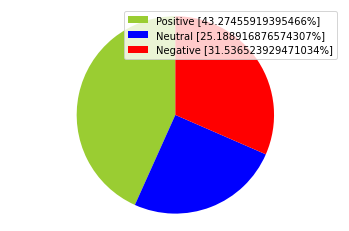

In [77]:
positive_percentage = len(positive_list)/len(tweet_list)*100
negative_percentage = len(negative_list)/len(tweet_list)*100
neutral_percentage = len(neutral_list)/len(tweet_list)*100
print(positive_percentage,negative_percentage, neutral_percentage )
labels = ['Positive ['+str(positive_percentage)+'%]' , 'Neutral ['+str(neutral_percentage)+'%]','Negative ['+str(negative_percentage)+'%]']
sizes = [positive_percentage, neutral_percentage, negative_percentage]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.axis('equal')
plt.show()